In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load dataset

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s3e15/data.csv')
df.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


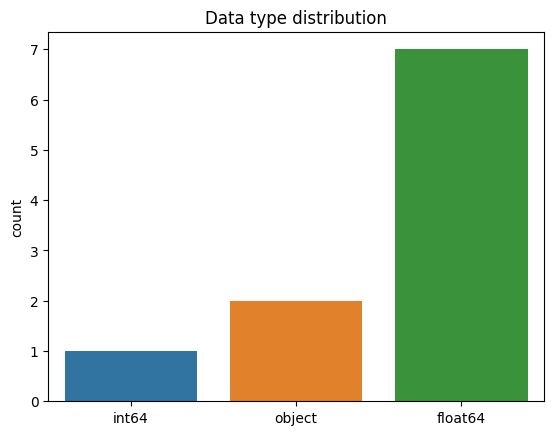

In [3]:
sns.countplot(x=df.dtypes)
plt.title('Data type distribution')
plt.show()

Text(0.5, 1.0, 'Geometry')

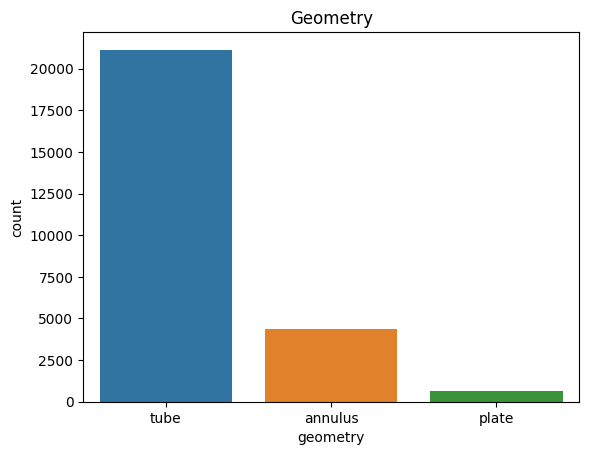

In [4]:
sns.countplot(x=df['geometry'])
plt.title('Geometry')

# Missing values

Text(0.5, 1.0, 'Proportion of missing values')

<Figure size 1000x600 with 0 Axes>

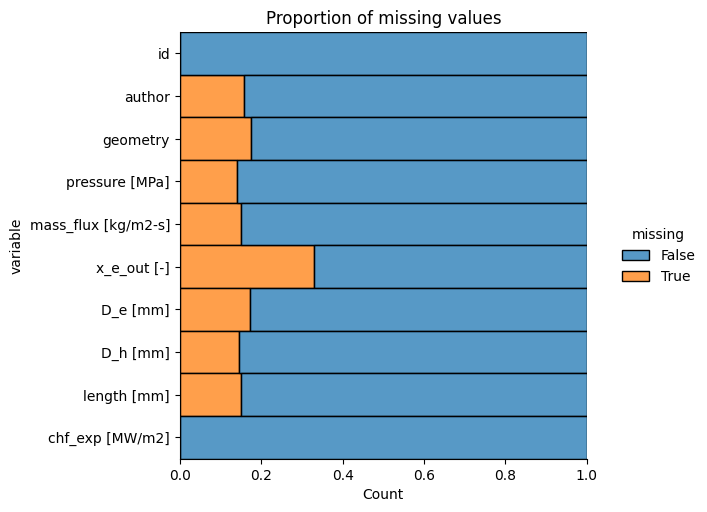

In [5]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title('Proportion of missing values')

As the data describtion says, it looks like 40% of the dataset is used for submission.

# Data Distribution

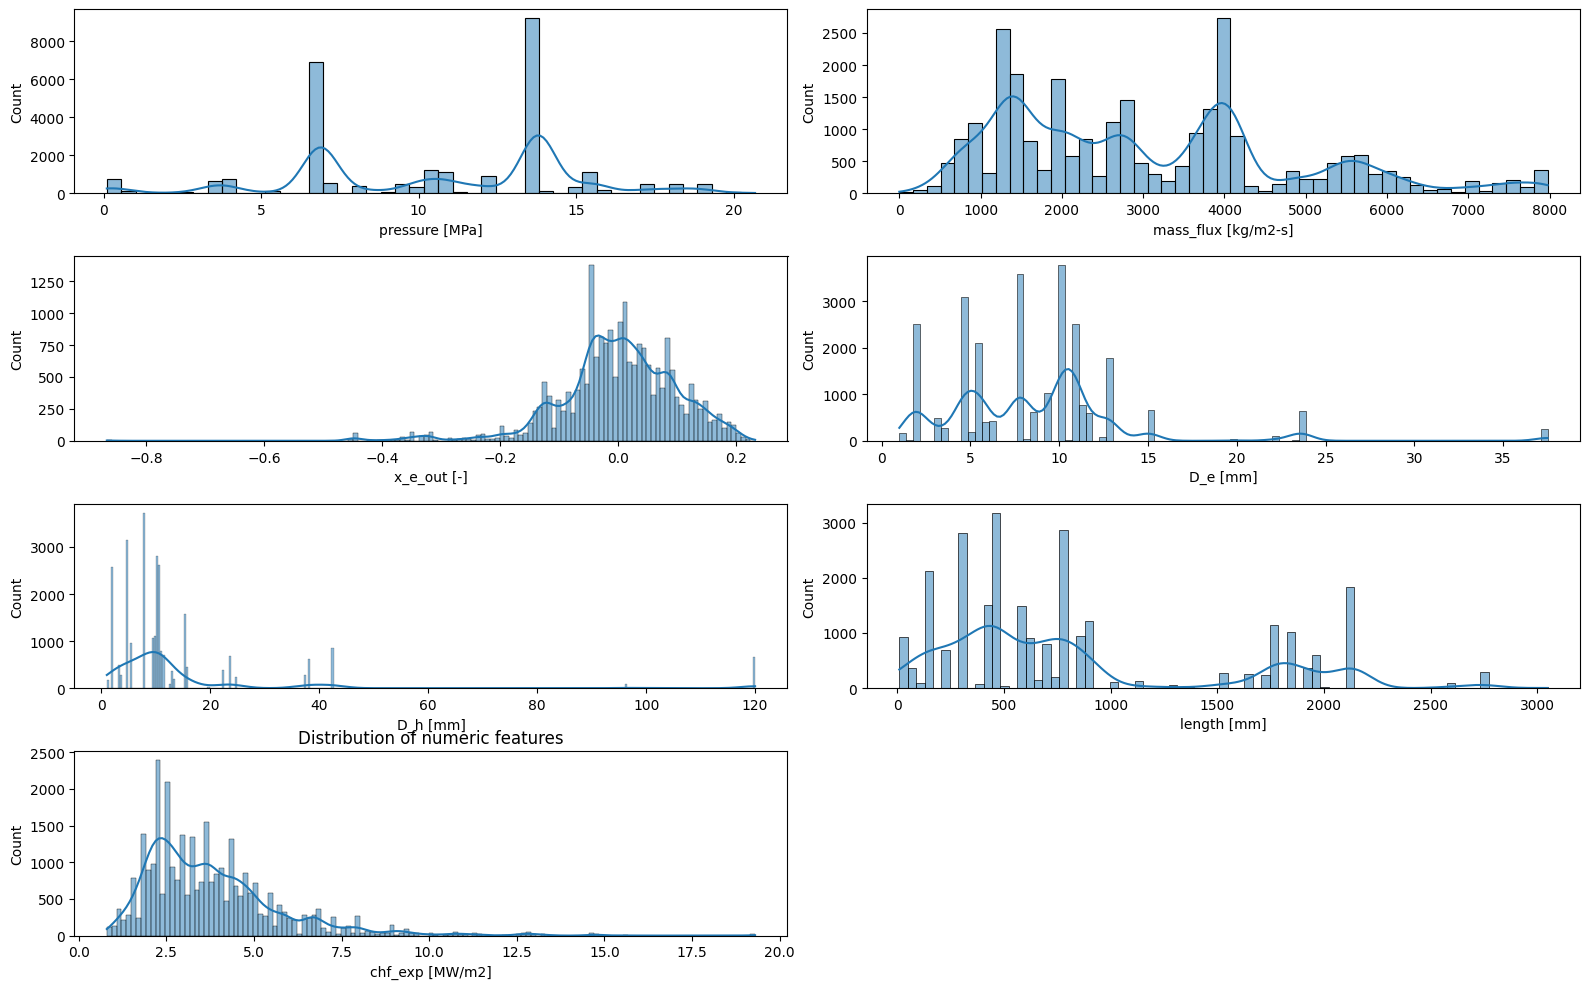

In [6]:
plt.figure(figsize=(16, 10))
cols = df.select_dtypes(include=['float64']).columns.tolist()
for count, col in enumerate(cols):
    plt.subplot(4,2, count +1)
    sns.histplot(data=df,x=col, kde=True)
    
plt.tight_layout()
plt.title('Distribution of numeric features')
plt.show()

# Which autor has the most NaN's to number of rows ratio?

In [7]:
#number of NaNs values with respect to author
nan_count = pd.DataFrame(df['x_e_out [-]'].isnull().groupby(df['author']).sum())
auth_row_count = pd.DataFrame(df['author'].value_counts())
tmp = pd.concat([nan_count, auth_row_count], axis=1)
tmp.columns = ['Number of NaNs', 'all author rows']
tmp.head()

,Number of NaNs,all author rows
Beus,517,1604
Inasaka,18,46
Janssen,870,2716
Kossolapov,31,101
Mortimore,67,197


In [8]:
pd.DataFrame(tmp['Number of NaNs'] / tmp['all author rows']).sort_values(by=0, ascending=False)

,0
Inasaka,0.391304
Williams,0.363636
Mortimore,0.340102
Thompson,0.331973
Peskov,0.327491
Weatherhead,0.325000
Beus,0.322319
Janssen,0.320324
Richenderfer,0.319266
Kossolapov,0.306931


It looks like all authors filled rows with missin target value around 30% to 40% times.

# Correlation matrix

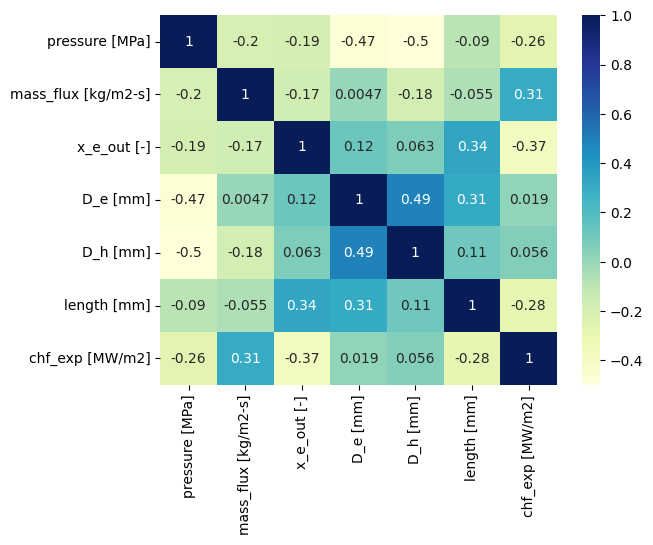

In [9]:
dataplot = sns.heatmap(df[cols].corr(), cmap="YlGnBu", annot=True)

The chart shows that there are not too many correlations, and if any, they are weak.